In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from datetime import datetime
import os
import scienceplots

plt.style.use('science')

outdir = "Figures/"
if not os.path.exists(outdir):
        os.makedirs(outdir)

### Output file reader

In [2]:
def readfile(filename, skip_first=0, skip_last=0):
    with open(filename, "r") as f:
        lines = f.readlines()

    # Slice away first and last lines
    middle_lines = lines[skip_first: len(lines) - skip_last]

    # Convert to NumPy array
    data = np.loadtxt(middle_lines)
    
    return data

### 1. Refractive Index

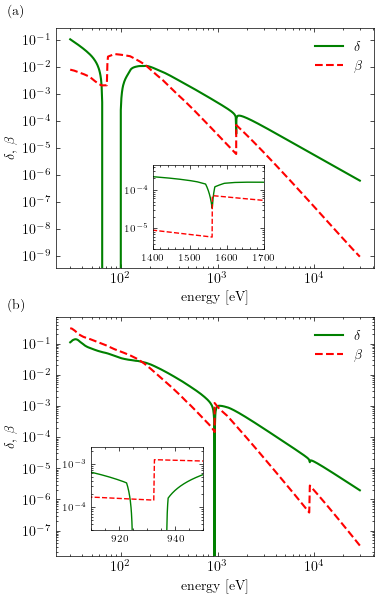

In [ ]:
# Apply your rcParams once
plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 10
})

# Create stacked figure
fig, axes = plt.subplots(2, 1, figsize=(4.2, 5.8))
plt.tight_layout(h_pad=2)

# --------- First subplot ---------
outdir = "Al/"
summary_output = os.path.join(outdir, "critical_angle.txt")
data = readfile(summary_output, skip_first=5, skip_last=3)
energies, deltas, betas, thetac_th, thetac_exp = data.T

ax = axes[0]
ax.plot(energies, deltas, linewidth=1.5, color="green", label=r"$\delta$")
ax.plot(energies, betas, linewidth=1.5, color="red", linestyle='dashed', label=r"$\beta$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=10))
ax.set_xlabel('energy [eV]')
ax.set_ylabel(r'$\delta$, $\beta$')
ax.legend(loc='best')
ax.text(-0.15, 1.1, "(a)", transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')

# --- Inset for subplot (a) ---
axins = inset_axes(ax, width="35%", height="35%", 
                   loc="lower center",
                   bbox_to_anchor=(-0.02, 0.07, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(energies, deltas, color="green")
axins.plot(energies, betas, color="red", linestyle="dashed")
axins.set_xlim(1400, 1700)
axins.set_ylim(0.5*min(betas[(energies>1400)&(energies<1700)]),
               2*max(deltas[(energies>1400)&(energies<1700)]))
axins.set_xscale('linear')
axins.set_yscale('log')
axins.tick_params(labelsize=10)


# --------- Second subplot ---------
outdir = "Cu/"
summary_output = os.path.join(outdir, "critical_angle.txt")
data = readfile(summary_output, skip_first=5, skip_last=3)
energies, deltas, betas, thetac_th, thetac_exp = data.T

ax = axes[1]
ax.plot(energies, deltas, linewidth=1.5, color="green", label=r"$\delta$")
ax.plot(energies, betas, linewidth=1.5, color="red", linestyle='dashed', label=r"$\beta$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=10))
ax.set_xlabel('energy [eV]')
ax.set_ylabel(r'$\delta$, $\beta$')
ax.legend(loc='best')
ax.text(-0.15, 1.08, "(b)", transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')

# --- Inset for subplot (b) ---
axins = inset_axes(ax, width="35%", height="35%", 
                   loc="lower left",
                   bbox_to_anchor=(0.09, 0.08, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(energies, deltas, color="green")
axins.plot(energies, betas, color="red", linestyle="dashed")
axins.set_xlim(910, 950)
axins.set_ylim(0.2*min(betas[(energies>910)&(energies<950)]),
               2*max(betas[(energies>910)&(energies<950)]))
axins.set_xscale('linear')
axins.set_yscale('log')
axins.tick_params(labelsize=10)


outdir = "Figures/"
filename = "1. Refractive Index.pdf"
filepath = os.path.join(outdir, filename)
plt.savefig(filepath)
plt.close()

### 2. Surface Roughness Profile

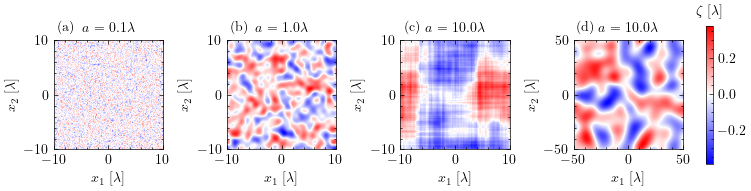

In [ ]:
def gaussian_random_surface(L, N, sigma, a):

    # grid set up
    x = np.linspace(-L, L, N, endpoint=False)
    y = np.linspace(-L, L, N, endpoint=False)
    X, Y = np.meshgrid(x, y)
    r = np.sqrt(X**2 + Y**2)

    # correlation function in real space
    Fr = sigma**2 * np.exp(-r**2/a**2)

    # spectral function
    gp = np.fft.fftshift(np.fft.fft2(Fr, norm='ortho'))

    # random phase in momentum space
    noise = np.random.normal(0, 1, (N, N)) + 1j * np.random.normal(0, 1, (N, N))
    zp = np.sqrt(gp) * noise

    # inverse fft to the real space
    zr = np.real(np.fft.ifft2(np.fft.fftshift(zp), norm='ortho')) 
    zr -= np.mean(zr)

    return zr

Lmax = 10
sigma = 5.0
N = 1000
alist = np.array([0.1, 1.0, 10.0, 10.0])
fig, axes = plt.subplots(1, 4, figsize=(7.5, 1.90), constrained_layout=True)
plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10})

for i, ax in enumerate(axes):
    if i == 3:
        Lmax = 50
    z = gaussian_random_surface(Lmax, N, sigma, alist[i])
    im = ax.imshow(z, cmap='bwr', extent=[-Lmax, Lmax, -Lmax, Lmax], origin='lower')
    title = '$a$ = ' + str(alist[i]) + '$\lambda$'
    ax.set_title(title)
    ax.set_xlabel(r'$x_1$ $[\lambda]$')
    ax.set_ylabel(r'$x_2$ $[\lambda]$')

labels = ['(a)', '(b)', '(c)', '(d)']
for ax, label in zip(axes, labels):
    ax.text(
        0.15, 1.05, label,
        transform=ax.transAxes,
        ha='right', va='bottom',
        fontsize=12, fontweight='bold')

cbar = fig.colorbar(im, ax=axes, location='right', fraction=0.04, pad=0.01)
cbar.ax.text(0.5, 1.1, r'$\zeta$ $[\lambda]$', transform=cbar.ax.transAxes, ha='center', va='center', fontsize=10)

outdir = "Figures/"
filename = "2. Surface Roughness Profile.pdf"
filepath = os.path.join(outdir, filename)

plt.savefig(filepath)
plt.close()

### 4. Reflectivity

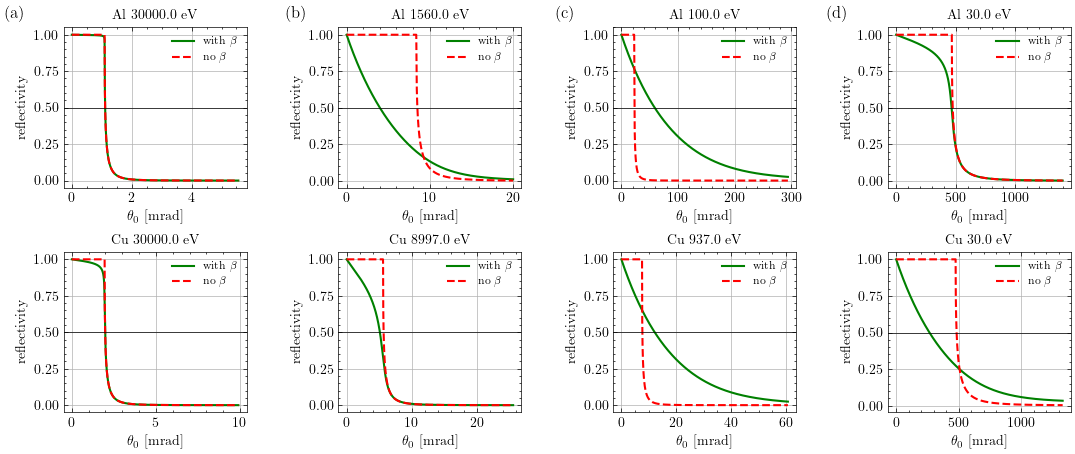

In [ ]:
def ref_plot(Al_energy, Cu_energy):
    fig, axes = plt.subplots(2, 4, figsize=(15, 6))
    fig.subplots_adjust(wspace=0.5, hspace=0.4) 
    plt.rcParams.update({
        'axes.titlesize': 12,
        'axes.labelsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 10})
    thetamax = 5 

    extra_space = 0.1
    for ax in axes[0, :]:   # shift 3rd row down
        pos = ax.get_position()
        ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])
    for ax in axes[1, :]:   # shift 4th row down too (so rows 3 and 4 stay aligned)
        pos = ax.get_position()
        ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])

    sample = "Al"
    letters = ['(a)', '(c)', '(e)', '(g)']
    for i in range(len(Al_energy)):
        if i == 3:
            thetamax = 3
    
        ax = axes[0, i]
        energy = Al_energy[i]

        outdir = sample + "/reflectivity/" + str(energy) + " eV/0-" + str(np.round(thetamax, 1)) + " θc"
        summary_output = os.path.join(outdir, "reflectivity.txt")
        data = readfile(summary_output, skip_first=8, skip_last=3)
        theta_i = data[:, 0]
        theta_i = theta_i * 1000
        ref_beta = data[:, 1]

        outdir = sample + "/reflectivity/" + str(energy) + " eV/0-" + str(np.round(thetamax, 1)) + " θc (without β)"
        summary_output = os.path.join(outdir, "reflectivity.txt")
        data = readfile(summary_output, skip_first=8, skip_last=3)
        theta_i = data[:, 0]
        theta_i = theta_i * 1000
        ref_nobeta = data[:, 1]

        ax.plot(theta_i, ref_beta, linewidth=1.5, color="green", label=r"with $\beta$")
        ax.plot(theta_i, ref_nobeta, linewidth=1.5, color="red", linestyle="dashed", label=r"no $\beta$")
        ax.axhline(y=0.5, linewidth=0.5, color="black")
        ax.grid(True)

        title =  letters[i] + " " + sample + " " + str(np.round(energy, 0)) + " eV"
        ax.set_title(title)
        ax.set_xlabel(r'$\theta_0$ [mrad]')
        ax.legend()

        ax.set_ylabel('reflectivity')

        if i == 3:
            thetamax = 5

    sample = "Cu"
    letters = ['(b)', '(d)', '(f)', '(h)']
    for i in range(len(Cu_energy)):
        ax = axes[1, i]
        energy = Cu_energy[i]

        outdir = sample + "/reflectivity/" + str(energy) + " eV/0-" + str(np.round(thetamax, 1)) + " θc"
        summary_output = os.path.join(outdir, "reflectivity.txt")
        data = readfile(summary_output, skip_first=8, skip_last=3)
        theta_i = data[:, 0]
        theta_i = theta_i * 1000
        ref_beta = data[:, 1]

        outdir = sample + "/reflectivity/" + str(energy) + " eV/0-" + str(np.round(thetamax, 1)) + " θc (without β)"
        summary_output = os.path.join(outdir, "reflectivity.txt")
        data = readfile(summary_output, skip_first=8, skip_last=3)
        theta_i = data[:, 0]
        theta_i = theta_i * 1000
        ref_nobeta = data[:, 1]

        ax.plot(theta_i, ref_beta, linewidth=1.5, color="green", label=r"with $\beta$")
        ax.plot(theta_i, ref_nobeta, linewidth=1.5, color="red", linestyle="dashed", label=r"no $\beta$")
        ax.axhline(y=0.5, linewidth=0.5, color="black")
        ax.grid(True)

        title =  letters[i] + " " + sample + " " + str(np.round(energy, 0)) + " eV"
        ax.set_title(title)

        ax.set_xlabel(r'$\theta_0$ [mrad]')
        ax.legend()
        ax.set_ylabel('reflectivity')

    outdir = "Figures/"
    filename = "4. Reflectivity.pdf"

    filepath = os.path.join(outdir, filename)
    plt.savefig(filepath)
    plt.close()

Al_energy = [30000.0059, 1559.92737, 100.038544, 30.0]
Cu_energy = [30000.0059, 8996.53418, 937.067261, 30.0]
ref_plot(Al_energy, Cu_energy)

### 5. Critical Angle

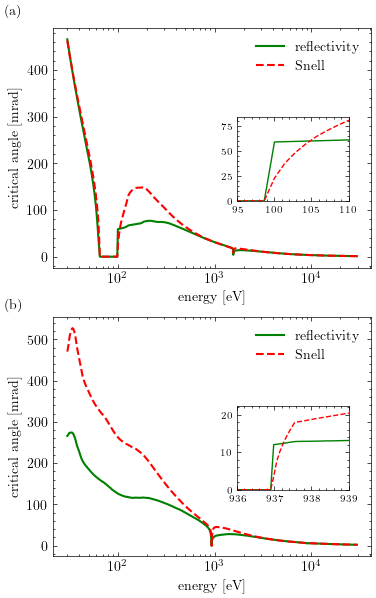

In [ ]:
# Apply your rcParams once
plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 10
})

# Create stacked figure
fig, axes = plt.subplots(2, 1, figsize=(3.8, 5.8))
plt.tight_layout(h_pad=2)

# --------- First subplot ---------
outdir = "Al/"
summary_output = os.path.join(outdir, "critical_angle.txt")
data = readfile(summary_output, skip_first=5, skip_last=3)
energies = data[:, 0]
deltas = data[:, 1]
betas = data[:, 2]
thetac_th = data[:, 3] * 1000
thetac_exp = data[:, 4]* 1000
ax = axes[0]
ax.plot(energies, thetac_exp, linewidth=1.5, color="green", label=r"reflectivity")
ax.plot(energies, thetac_th, linewidth=1.5, color="red", linestyle='dashed', label=r"Snell")
ax.set_xscale('log')
ax.set_xlabel('energy [eV]')
ax.set_ylabel('critical angle [mrad]')
ax.legend(loc='best')
ax.text(-0.15, 1.1, "(a)", transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')

axins = inset_axes(ax, width="35%", height="35%", 
                   loc="lower right",
                   bbox_to_anchor=(-0.05, 0.25, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(energies, thetac_exp, color="green")
axins.plot(energies, thetac_th, color="red", linestyle="dashed")
axins.set_xlim(95, 110)
axins.set_ylim(0,
               1.1*max(thetac_th[(energies>95)&(energies<110)]))
axins.set_xscale('linear')
axins.set_yscale('linear')
axins.tick_params(labelsize=10)

# --------- Second subplot ---------
outdir = "Cu/"
summary_output = os.path.join(outdir, "critical_angle.txt")
data = readfile(summary_output, skip_first=5, skip_last=3)
energies = data[:, 0]
deltas = data[:, 1]
betas = data[:, 2]
thetac_th = data[:, 3] * 1000
thetac_exp = data[:, 4]  * 1000
ax = axes[1]
ax.plot(energies, thetac_exp, linewidth=1.5, color="green", label=r"reflectivity")
ax.plot(energies, thetac_th, linewidth=1.5, color="red", linestyle='dashed', label=r"Snell")
ax.set_xscale('log')
ax.set_xlabel('energy [eV]')
ax.set_ylabel('critical angle [mrad]')
ax.legend(loc='best')
ax.text(-0.15, 1.08, "(b)", transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')

axins = inset_axes(ax, width="35%", height="35%", 
                   loc="lower right",
                   bbox_to_anchor=(-0.05, 0.25, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(energies, thetac_exp, color="green")
axins.plot(energies, thetac_th, color="red", linestyle="dashed")
axins.set_xlim(936, 939)
axins.set_ylim(0,
               1.1*max(thetac_th[(energies>935)&(energies<939)]))
axins.set_xscale('linear')
axins.set_yscale('linear')
axins.tick_params(labelsize=10)

outdir = "Figures/"
filename = "5. Critical Angle.pdf"
filepath = os.path.join(outdir, filename)

plt.savefig(filepath)
plt.close()

### 6. MDRC at Hard X-ray

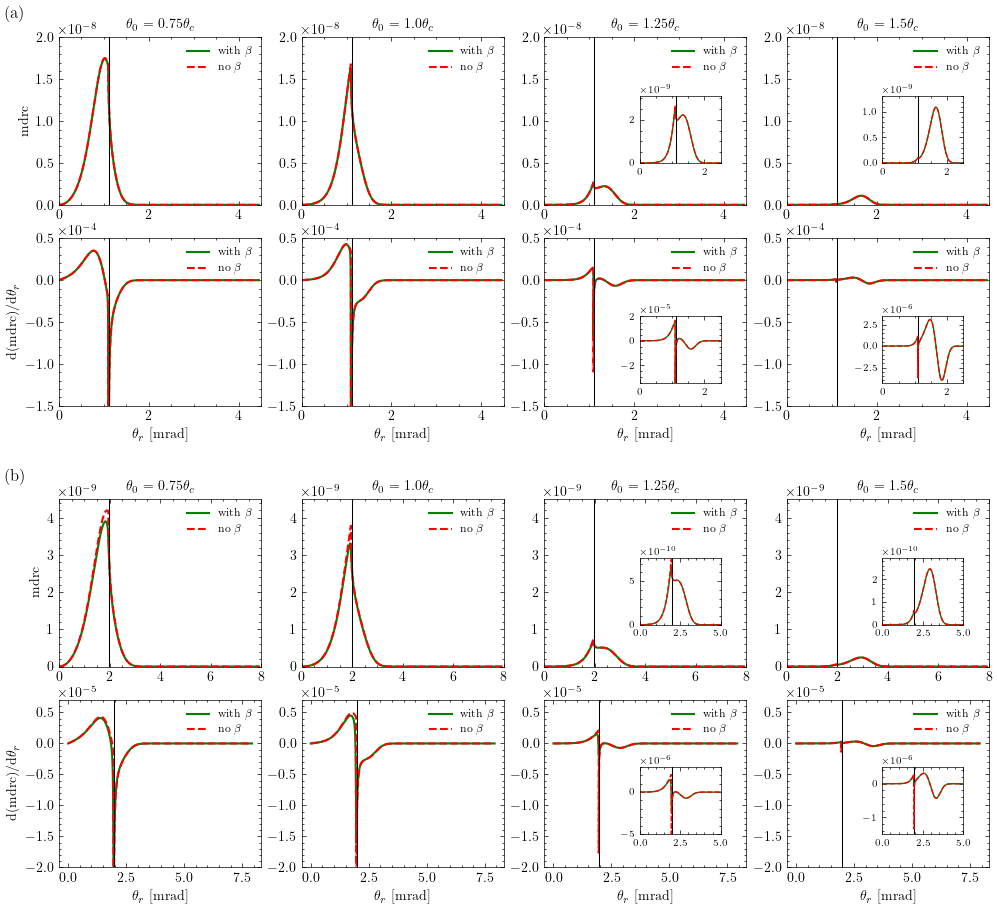

In [ ]:
# Apply your rcParams once
plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 10
})

# Create stacked figure
fig, axes = plt.subplots(4, 4, figsize=(15, 11))
extra_space = 0.06
for ax in axes[2, :]:   # shift 3rd row down
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])
for ax in axes[3, :]:   # shift 4th row down too (so rows 3 and 4 stay aligned)
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])

thetai = [0.5, 0.75, 1.0, 1.25, 1.5]
points = 2000

sample = "Al"
energy = 30000.0059
alength = 750000
wvlength = 1240/energy

outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)
theta_i = data[:, 0]
theta_r = data[:points, 1]
theta_r = theta_r * 1000
thetac = theta_i[-1] * 1000 / np.max(thetai)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    if i > 2 and not hasattr(ax, "_inset"):
        axins = inset_axes(ax, width="45%", height="45%", 
                           loc="center right",
                           bbox_to_anchor=(-0.1, -0.05, 1, 1),
                           bbox_transform=ax.transAxes)
        ax._inset = axins
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    if i > 2:
        ax._inset.plot(theta_r[:points-1], mdrc[:points-1], color="green")
        ax._inset.set_xlim(0, 2.5)
        ax._inset.set_ylim(0, 1.2*np.max(mdrc))
        ax._inset.axvline(x=thetac, linewidth=0.75, color="black")
    
    ax = axes[1, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    if i > 2 and not hasattr(ax, "_inset"):
        axins = inset_axes(ax, width="45%", height="45%", 
                           loc="lower right",
                           bbox_to_anchor=(-0.1, 0.1, 1, 1),
                           bbox_transform=ax.transAxes)
        ax._inset = axins
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        if i == 3:
            axins.set_ylim(-12291888289542.62, 7023936165452.926)

    if i > 2:
        ax._inset.plot(theta_r[:points-1], dmdrc[:points-1], color="green")
        ax._inset.set_xlim(0, 2.5)
        ax._inset.axvline(x=thetac, linewidth=0.75, color="black")
    
outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc (without β)" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    if i > 2 and hasattr(ax, "_inset"):
        ax._inset.plot(theta_r[:points-1], mdrc[:points-1], color="red", linestyle="dashed")
    
    ax = axes[1, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    if i > 2 and hasattr(ax, "_inset"):
        ax._inset.plot(theta_r[:points-1], dmdrc[:points-1], color="red", linestyle="dashed")

letters = ['(a)', '(b)', '(c)', '(d)']
for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    if i == 1:
        ax.set_ylabel('mdrc [arb. unit]')
    ax.set_ylim(0, 7023936165.452926)
    ax.set_xlim(0, 4.5)
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    ax.legend(loc="upper right")
    title = letters[i-1] + " " + sample + r" 30.0 keV, $\theta_0$ = " + str(thetai[i]) + r"$\theta_c$"
    ax.set_title(title)

    ax = axes[1, i-1]
    ax.set_xlabel(r'$\theta_r$ [mrad]')
    if i == 1:
        ax.set_ylabel(r'd(mdrc)/d$\theta_r$ [arb. unit]')
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    ax.set_ylim(-52679521240896.945, 17559840413632.314)
    ax.set_xlim(0, 4.5)
    ax.legend(loc="upper right")

#####################################################################################################################################

sample = "Cu"
energy = 30000.0059
alength = 200000
wvlength = 1240/energy

outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)
theta_i = data[:, 0]
theta_r = data[:points, 1]
theta_r = theta_r * 1000
thetac = theta_i[-1] * 1000 / np.max(thetai)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    if i > 2 and not hasattr(ax, "_inset"):
        axins = inset_axes(ax, width="45%", height="45%", 
                           loc="center right",
                           bbox_to_anchor=(-0.1, -0.05, 1, 1),
                           bbox_transform=ax.transAxes)
        ax._inset = axins
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    if i > 2:
        ax._inset.plot(theta_r[:points-1], mdrc[:points-1], color="green")
        ax._inset.set_xlim(0, 5)
        ax._inset.set_ylim(0, 1.2*np.max(mdrc))
        ax._inset.axvline(x=thetac, linewidth=0.75, color="black")
    
    ax = axes[3, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    if i > 2 and not hasattr(ax, "_inset"):
        axins = inset_axes(ax, width="45%", height="45%", 
                           loc="center right",
                           bbox_to_anchor=(-0.1, -0.1, 1, 1),
                           bbox_transform=ax.transAxes)
        ax._inset = axins
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    if i > 2:
        ax._inset.plot(theta_r[:points-1], dmdrc[:points-1], color="green")
        ax._inset.set_xlim(0, 5)
        ax._inset.axvline(x=thetac, linewidth=0.75, color="black")
    
    if i == 3:
        ax._inset.set_ylim(-1755984041363.2314, 1053590424817.9388)
    if i == 4:
        ax._inset.set_ylim(-526795212408.9694, 175598404136.32315)
    
outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc (without β)" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    if i > 2 and hasattr(ax, "_inset"):
        ax._inset.plot(theta_r[:points-1], mdrc[:points-1], color="red", linestyle="dashed")
    
    ax = axes[3, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    if i > 2 and hasattr(ax, "_inset"):
        ax._inset.plot(theta_r[:points-1], dmdrc[:points-1], color="red", linestyle="dashed")

letters = ['(e)', '(f)', '(g)', '(h)']
for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    if i == 1:
        ax.set_ylabel('mdrc [arb. unit]')
    ax.set_ylim(0, 1580385637.2269082)
    ax.set_xlim(0, 8)
    ax.legend(loc="upper right")
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    title = letters[i-1] + " " + sample + r" 30.0 keV, $\theta_0$ = " + str(thetai[i]) + r"$\theta_c$"
    ax.set_title(title)

    ax = axes[3, i-1]
    ax.set_xlabel(r'$\theta_r$ [mrad]')
    if i == 1:
        ax.set_ylabel(r'd(mdrc)/d$\theta_r$ [arb. unit]')
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    ax.set_ylim(-7023936165452.926, 2458377657908.524)
    ax.set_xlim(0, 8)
    ax.legend(loc="upper right")

for axrow in axes:
    for ax in axrow:
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

outdir = "Figures/"
filename = "6. MDRC Hard X-ray.pdf"
filepath = os.path.join(outdir, filename)

plt.savefig(filepath)
plt.close()

### 7. MDRC at Hard X-Ray Near Resonant

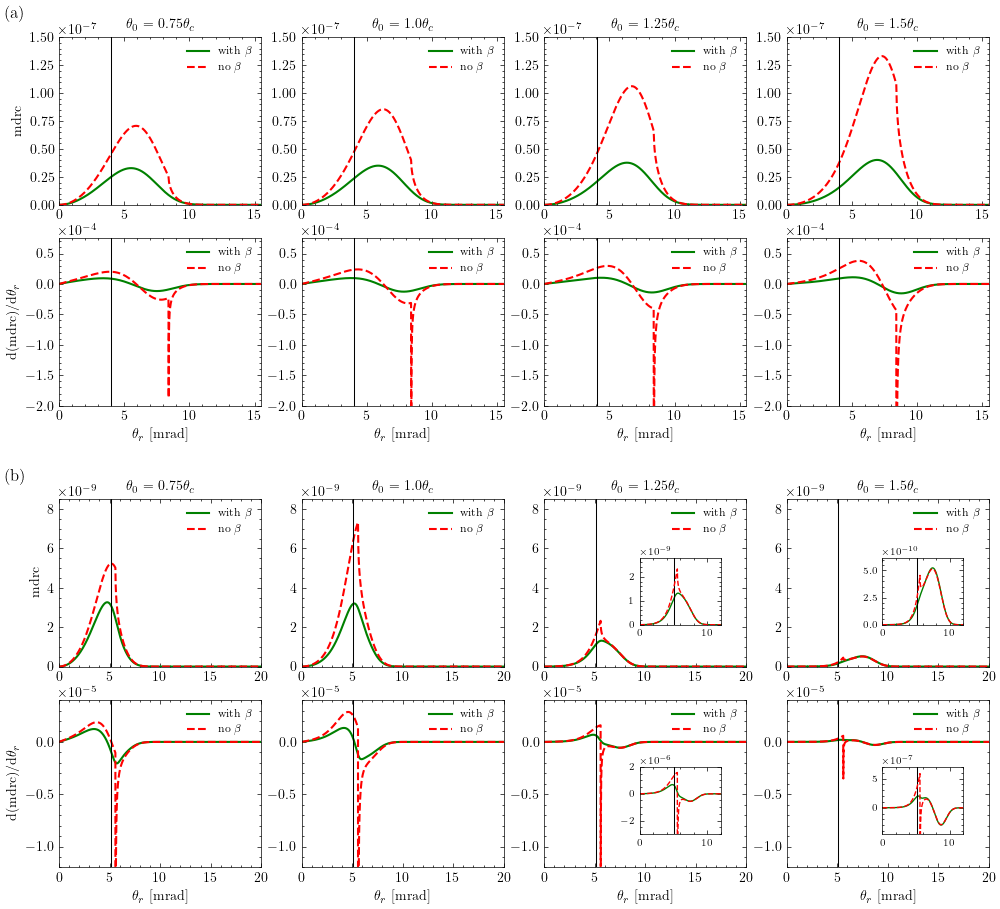

In [ ]:
# Apply your rcParams once
plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 10
})

# Create stacked figure
fig, axes = plt.subplots(4, 4, figsize=(15, 11))
extra_space = 0.06
for ax in axes[2, :]:   # shift 3rd row down
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])
for ax in axes[3, :]:   # shift 4th row down too (so rows 3 and 4 stay aligned)
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])


thetai = [0.5, 0.75, 1.0, 1.25, 1.5]
points = 2000

sample = "Al"
energy = 1559.92737
alength = 15000
wvlength = 1240/energy

outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)
theta_i = data[:, 0]
theta_r = data[:points, 1]
theta_r = theta_r * 1000
thetac = theta_i[-1] * 1000 / np.max(thetai)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    
    ax = axes[1, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    
outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc (without β)" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

min = np.zeros(4)
for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    
    ax = axes[1, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')

letters = ['(a)', '(b)', '(c)', '(d)']
for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    if i == 1:
        ax.set_ylabel('mdrc [arb. unit]')
    ax.set_ylim(0, 142432105.8602761)
    ax.set_xlim(0, 15.5)
    ax.legend(loc="upper right")
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    title = letters[i-1] + " " + sample + " " + str(np.round(energy, 0)) + " eV" r", $\theta_0$ = " + str(thetai[i]) + r"$\theta_c$"
    ax.set_title(title)

    ax = axes[1, i-1]
    ax.set_xlabel(r'$\theta_r$ [mrad]')
    if i == 1:
        ax.set_ylabel(r'd(mdrc)/d$\theta_r$ [arb. unit]')
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    ax.set_ylim(-189909474480.36816, 71216052930.13805)
    ax.set_xlim(0, 15.5)
    ax.legend(loc="upper right")

#####################################################################################################################################

sample = "Cu"
energy = 8996.53418
alength = 25000
wvlength = 1240/energy

outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)
theta_i = data[:, 0]
theta_r = data[:points, 1]
theta_r = theta_r * 1000
thetac = theta_i[-1] * 1000 / np.max(thetai)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    if i > 2 and not hasattr(ax, "_inset"):
        axins = inset_axes(ax, width="45%", height="45%", 
                           loc="center right",
                           bbox_to_anchor=(-0.1, -0.05, 1, 1),
                           bbox_transform=ax.transAxes)
        ax._inset = axins
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    if i > 2:
        ax._inset.plot(theta_r[:points-1], mdrc[:points-1], color="green")
        ax._inset.set_xlim(0, 12)
        ax._inset.axvline(x=thetac, linewidth=0.75, color="black")
    
    ax = axes[3, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    if i > 2 and not hasattr(ax, "_inset"):
        axins = inset_axes(ax, width="45%", height="45%", 
                           loc="center right",
                           bbox_to_anchor=(-0.1, -0.1, 1, 1),
                           bbox_transform=ax.transAxes)
        ax._inset = axins
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    if i > 2:
        ax._inset.plot(theta_r[:points-1], dmdrc[:points-1], color="green")
        ax._inset.set_xlim(0, 12)
        ax._inset.axvline(x=thetac, linewidth=0.75, color="black")
    
    if i == 3:
        ax._inset.set_ylim(-94750083931.73447, 63166722621.15633)
    if i == 4:
        ax._inset.set_ylim(-14212512589.760172, 22108352917.404713)
    
outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc (without β)" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    if i > 2 and hasattr(ax, "_inset"):
        ax._inset.plot(theta_r[:points-1], mdrc[:points-1], color="red", linestyle="dashed")
        ax._inset.set_ylim(0, 1.2*np.max(mdrc))
    
    ax = axes[3, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    if i > 2 and hasattr(ax, "_inset"):
        ax._inset.plot(theta_r[:points-1], dmdrc[:points-1], color="red", linestyle="dashed")

letters = ['(e)', '(f)', '(g)', '(h)']
for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    if i == 1:
        ax.set_ylabel('mdrc [arb. unit]')
    ax.set_ylim(0, 268458571.13991433)
    ax.set_xlim(0, 20)
    ax.legend(loc="upper right")
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    title = letters[i-1] + " " + sample + " " + str(np.round(energy, 0)) + " eV" r", $\theta_0$ = " + str(thetai[i]) + r"$\theta_c$"
    ax.set_title(title)

    ax = axes[3, i-1]
    ax.set_xlabel(r'$\theta_r$ [mrad]')
    if i == 1:
        ax.set_ylabel(r'd(mdrc)/d$\theta_r$ [arb. unit]')
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    ax.set_ylim(-379000335726.93787, 126333445242.31265)
    ax.set_xlim(0, 20)
    ax.legend(loc="upper right")

for axrow in axes:
    for ax in axrow:
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

outdir = "Figures/"
filename = "7. MDRC Near Hard X-Ray Resonant.pdf"
filepath = os.path.join(outdir, filename)

plt.savefig(filepath)
plt.close()

### 8. MDRC at Soft X-Ray Near Resonant

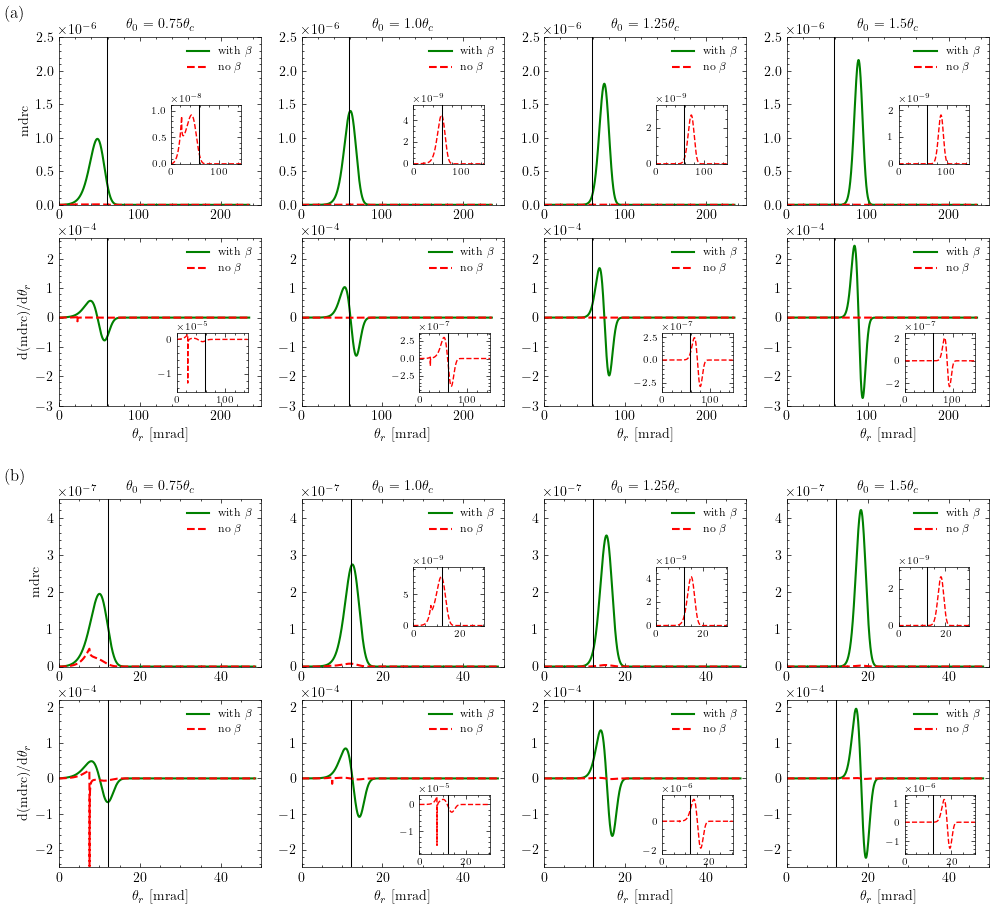

In [ ]:
# Apply your rcParams once
plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 10
})

# Create stacked figure
fig, axes = plt.subplots(4, 4, figsize=(15, 11))
extra_space = 0.06
for ax in axes[2, :]:   # shift 3rd row down
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])
for ax in axes[3, :]:   # shift 4th row down too (so rows 3 and 4 stay aligned)
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])

thetai = [0.5, 0.75, 1.0, 1.25, 1.5]
points = 2000

sample = "Al"
energy = 100.038544
alength = 500.0
wvlength = 1240/energy

outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)
theta_i = data[:, 0]
theta_r = data[:points, 1]
theta_r = theta_r * 1000
thetac = theta_i[-1] * 1000 / np.max(thetai)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    
    ax = axes[1, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    
outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc (without β)" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    axins = inset_axes(ax, width="40%", height="40%", 
                   loc="center right",
                   bbox_to_anchor=(-0.07, -0.08, 1, 1),
                   bbox_transform=ax.transAxes)
    axins.plot(theta_r[:points-1], mdrc[:points-1], color="red", linestyle="dashed")
    axins.set_xlim(0, 2.5*thetac)
    axins.set_ylim(0, 1.2*np.max(mdrc))
    axins.axvline(x=thetac, linewidth=0.75, color="black")
    axins.tick_params(labelsize=10)
    axins.title.set_fontsize(10)
    axins.xaxis.label.set_fontsize(10)
    axins.yaxis.label.set_fontsize(10)
    axins.xaxis.get_offset_text().set_fontsize(10)
    axins.yaxis.get_offset_text().set_fontsize(10)
    axins.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax = axes[1, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    axins = inset_axes(ax, width="40%", height="40%", 
                   loc="lower right",
                   bbox_to_anchor=(-0.04, 0.08, 1, 1),
                   bbox_transform=ax.transAxes)
    axins.plot(theta_r[:points-1], dmdrc[:points-1], color="red", linestyle="dashed")
    axins.set_xlim(0, 2.5*thetac)
    axins.set_ylim(1.2*np.min(dmdrc), 1.2*np.max(dmdrc))
    axins.axvline(x=thetac, linewidth=0.75, color="black")
    axins.tick_params(labelsize=10)
    axins.title.set_fontsize(10)
    axins.xaxis.label.set_fontsize(10)
    axins.yaxis.label.set_fontsize(10)
    axins.xaxis.get_offset_text().set_fontsize(10)
    axins.yaxis.get_offset_text().set_fontsize(10)

letters = ['(a)', '(b)', '(c)', '(d)']
for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    if i == 1:
        ax.set_ylabel('mdrc [arb. unit]')
    ax.set_ylim(0, 9762984.799986929)
    ax.set_xlim(0, 250)
    ax.legend(loc="upper right")
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    title = letters[i-1] + " " + sample + " " + str(np.round(energy, 0)) + " eV" r", $\theta_0$ = " + str(thetai[i]) + r"$\theta_c$"
    ax.set_title(title)

    ax = axes[1, i-1]
    ax.set_xlabel(r'$\theta_r$ [mrad]')
    if i == 1:
        ax.set_ylabel(r'd(mdrc)/d$\theta_r$')
    ax.set_ylim(-1757337263.9976475, 1054402358.3985885)
    ax.set_xlim(0, 250)
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    ax.legend(loc="upper right")

#####################################################################################################################################

sample = "Cu"
energy = 937.067261
alength = 10000
wvlength = 1240/energy

outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)
theta_i = data[:, 0]
theta_r = data[:points, 1]
theta_r = theta_r * 1000
thetac = theta_i[-1] * 1000 / np.max(thetai)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    
    ax = axes[3, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    
outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc (without β)" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

min = np.zeros(4)
for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    if i != 1:
        axins = inset_axes(ax, width="40%", height="40%", 
                   loc="center right",
                   bbox_to_anchor=(-0.07, -0.08, 1, 1),
                   bbox_transform=ax.transAxes)
        axins.plot(theta_r[:points-1], mdrc[:points-1], color="red", linestyle="dashed")
        axins.set_xlim(0, 2.5*thetac)
        axins.set_ylim(0, 1.2*np.max(mdrc))
        axins.axvline(x=thetac, linewidth=0.75, color="black")
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)
    
    ax = axes[3, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    min[i-1] = np.min(dmdrc)
    if i != 1:
        axins = inset_axes(ax, width="40%", height="40%", 
                   loc="lower right",
                   bbox_to_anchor=(-0.04, 0.08, 1, 1),
                   bbox_transform=ax.transAxes)
        axins.plot(theta_r[:points-1], dmdrc[:points-1], color="red", linestyle="dashed")
        axins.set_xlim(0, 2.5*thetac)
        axins.set_ylim(1.2*np.min(dmdrc), 1.2*np.max(dmdrc))
        axins.axvline(x=thetac, linewidth=0.75, color="black")
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)

letters = ['(e)', '(f)', '(g)', '(h)']
for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    if i == 1:
        ax.set_ylabel('mdrc [arb. unit]')
    ax.set_ylim(0, 154192029.09877172)
    ax.set_xlim(0, 50)
    ax.legend(loc="upper right")
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    title = letters[i-1] + " " + sample + " " + str(np.round(energy, 0)) + " eV" r", $\theta_0$ = " + str(thetai[i]) + r"$\theta_c$"
    ax.set_title(title)

    ax = axes[3, i-1]
    ax.set_xlabel(r'$\theta_r$ [mrad]')
    if i == 1:
        ax.set_ylabel(r'd(mdrc)/d$\theta_r$ [arb. unit]')
    ax.set_ylim(-128493357582.30978, 75382769781.62173)
    ax.set_xlim(0, 50)
    ax.legend(loc="upper right")
    ax.axvline(x=thetac, linewidth=0.75, color="black")

for axrow in axes:
    for ax in axrow:
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

outdir = "Figures/"
filename = "8. MDRC Near Soft X-Ray Resonant.pdf"
filepath = os.path.join(outdir, filename)

plt.savefig(filepath)
plt.close()

### 9. MDRC at Vacuum UV for s to s Reflection

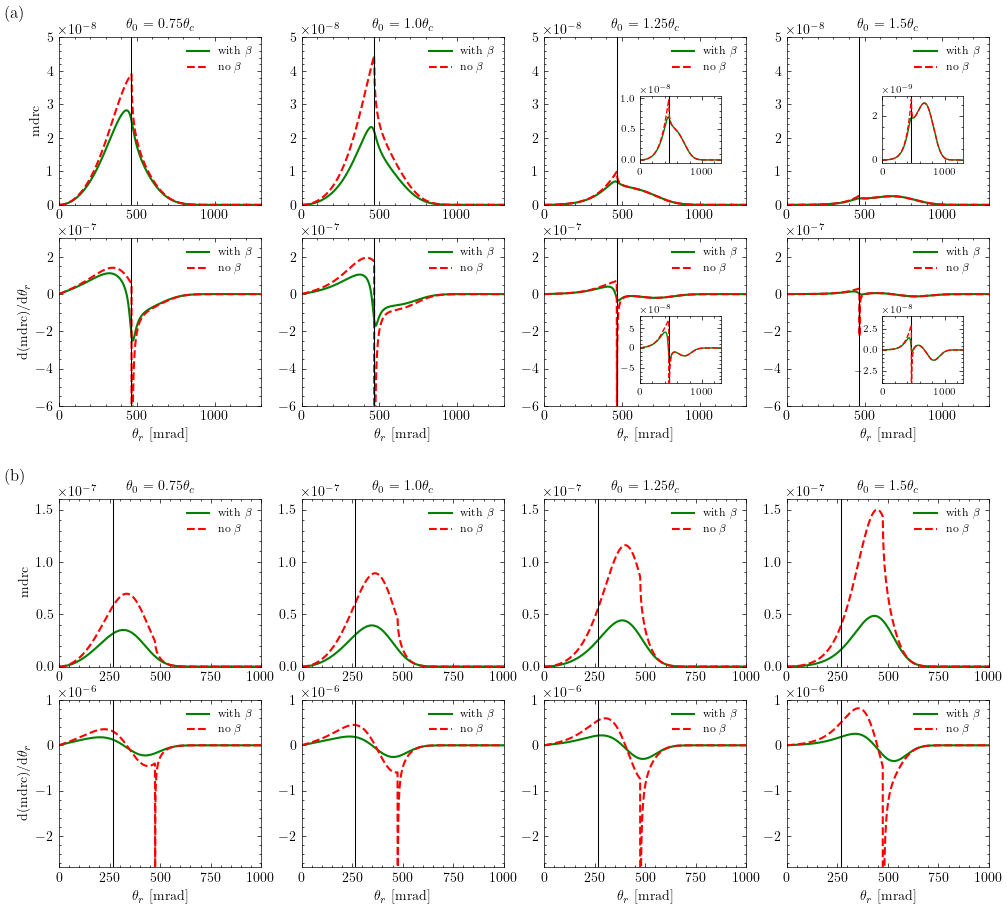

In [ ]:
# Apply your rcParams once
plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 10
})

# Create stacked figure
fig, axes = plt.subplots(4, 4, figsize=(15, 11))
extra_space = 0.06
for ax in axes[2, :]:   # shift 3rd row down
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])
for ax in axes[3, :]:   # shift 4th row down too (so rows 3 and 4 stay aligned)
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])


thetai = [0.5, 0.75, 1.0, 1.25, 1.5]
points = 2000

sample = "Al"
energy = 30.0
alength = 2.5
wvlength = 1245/energy

outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)
theta_i = data[:, 0]
theta_r = data[:points, 1]
theta_r = theta_r * 1000
thetac = theta_i[-1] * 1000 / np.max(thetai)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    if i > 2 and not hasattr(ax, "_inset"):
        axins = inset_axes(ax, width="45%", height="45%", 
                           loc="center right",
                           bbox_to_anchor=(-0.0, -0.05, 1, 1),
                           bbox_transform=ax.transAxes)
        ax._inset = axins
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    if i > 2:
        ax._inset.plot(theta_r[:points-1], mdrc[:points-1], color="green")
        ax._inset.set_xlim(0, 1300)
        ax._inset.axvline(x=thetac, linewidth=0.75, color="black")
    
    ax = axes[1, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    if i > 2 and not hasattr(ax, "_inset"):
        axins = inset_axes(ax, width="45%", height="45%", 
                           loc="lower right",
                           bbox_to_anchor=(-0.0, 0.07, 1, 1),
                           bbox_transform=ax.transAxes)
        ax._inset = axins
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    if i > 2:
        ax._inset.plot(theta_r[:points-1], dmdrc[:points-1], color="green")
        ax._inset.set_xlim(0, 1300)
        ax._inset.axvline(x=thetac, linewidth=0.75, color="black")
    
    if i == 3:
        ax._inset.set_ylim(-31607.700312174817, 28095.733610822062)
    
    if i == 4:
        ax._inset.set_ylim(-14047.866805411031, 14047.866805411031)
    
outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc (without β)" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    if i > 2 and hasattr(ax, "_inset"):
        ax._inset.plot(theta_r[:points-1], mdrc[:points-1], color="red", linestyle="dashed")
    
    ax = axes[1, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    if i > 2 and hasattr(ax, "_inset"):
        ax._inset.plot(theta_r[:points-1], dmdrc[:points-1], color="red", linestyle="dashed")

letters = ['(a)', '(b)', '(c)', '(d)']
for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    if i == 1:
        ax.set_ylabel('mdrc [arb. unit]')
    ax.set_ylim(0, 17559.83350676379)
    ax.set_xlim(0, 1300)
    ax.legend()
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    title = letters[i-1] + " " + sample + " " + str(np.round(energy, 0)) + " eV" r", $\theta_0$ = " + str(thetai[i]) + r"$\theta_c$"
    ax.set_title(title)

    ax = axes[1, i-1]
    ax.set_xlabel(r'$\theta_r$ [mrad]')
    if i == 1:
        ax.set_ylabel(r'd(mdrc)/d$\theta_r$ [arb. unit]')
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    ax.set_ylim(-210718.00208116544, 105359.00104058272)
    ax.set_xlim(0, 1300)
    ax.legend()

#####################################################################################################################################

sample = "Cu"
energy = 30.0
alength = 5.0
wvlength = 1245/energy

outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)
theta_i = data[:, 0]
theta_r = data[:points, 1]
theta_r = theta_r * 1000
thetac = theta_i[-1] * 1000 / np.max(thetai)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    
    ax = axes[3, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    
outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc (without β)" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 2]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 3]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    
    ax = axes[3, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')

letters = ['(e)', '(f)', '(g)', '(h)']
for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    if i == 1:
        ax.set_ylabel('mdrc [arb. unit]')
    ax.set_ylim(0, 56191.467221644125)
    ax.set_xlim(0, 1000)
    ax.legend()
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    title = letters[i-1] + " " + sample + " " + str(np.round(energy, 0)) + " eV" r", $\theta_0$ = " + str(thetai[i]) + r"$\theta_c$"
    ax.set_title(title)

    ax = axes[3, i-1]
    ax.set_xlabel(r'$\theta_r$ [mrad]')
    if i == 1:
        ax.set_ylabel(r'd(mdrc)/d$\theta_r$ [arb. unit]')
    ax.set_ylim(-948231.0093652445, 351196.67013527575)
    ax.set_xlim(0, 1000)
    ax.legend()
    ax.axvline(x=thetac, linewidth=0.75, color="black")

for axrow in axes:
    for ax in axrow:
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

outdir = "Figures/"
filename = "9. MDRC Vacuum UV s Polarization.pdf"
filepath = os.path.join(outdir, filename)

plt.savefig(filepath)
plt.close()

### 10. MDRC at Vacuum UV for p to p Reflection

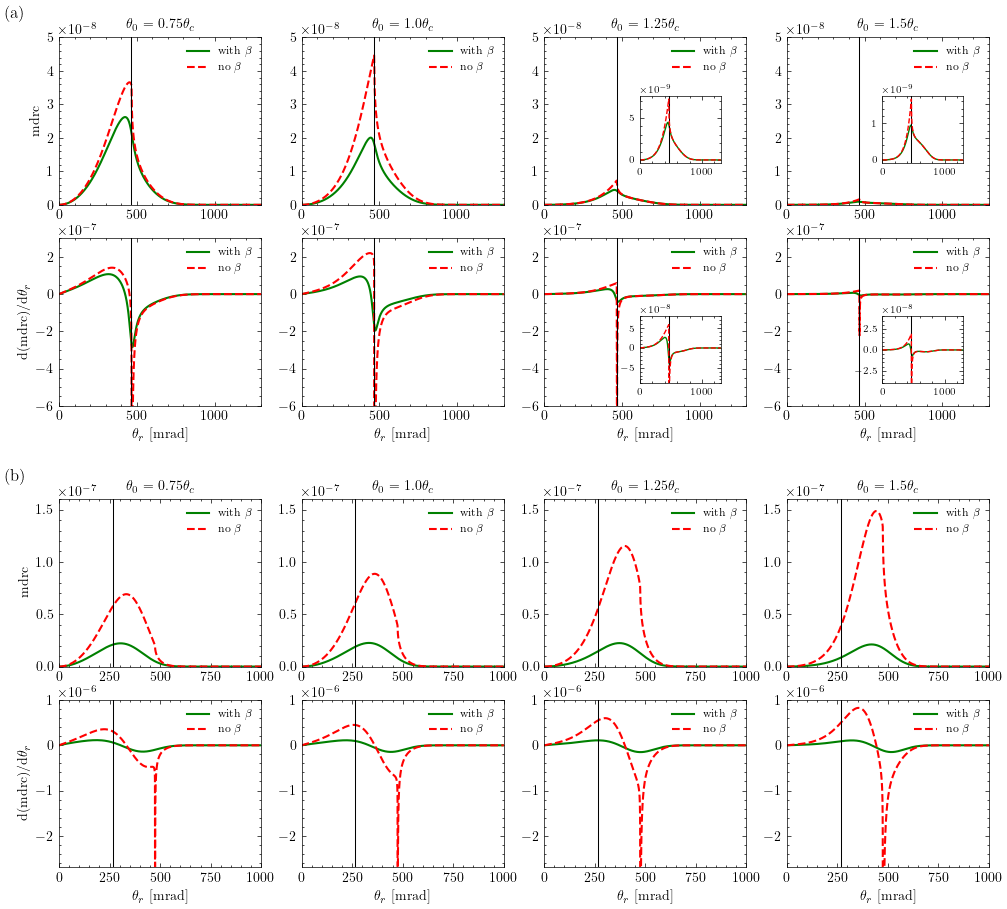

In [ ]:
# Apply your rcParams once
plt.rcParams.update({
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 10
})

# Create stacked figure
fig, axes = plt.subplots(4, 4, figsize=(15, 11))
extra_space = 0.06
for ax in axes[2, :]:   # shift 3rd row down
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])
for ax in axes[3, :]:   # shift 4th row down too (so rows 3 and 4 stay aligned)
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0 - extra_space, pos.width, pos.height])


thetai = [0.5, 0.75, 1.0, 1.25, 1.5]
points = 2000

sample = "Al"
energy = 30.0
alength = 2.5
wvlength = 1245/energy

outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)
theta_i = data[:, 0]
theta_r = data[:points, 1]
theta_r = theta_r * 1000
thetac = theta_i[-1] * 1000 / np.max(thetai)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 4]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 5]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    if i > 2 and not hasattr(ax, "_inset"):
        axins = inset_axes(ax, width="45%", height="45%", 
                           loc="center right",
                           bbox_to_anchor=(-0.0, -0.05, 1, 1),
                           bbox_transform=ax.transAxes)
        ax._inset = axins
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    if i > 2:
        ax._inset.plot(theta_r[:points-1], mdrc[:points-1], color="green")
        ax._inset.set_xlim(0, 1300)
        ax._inset.axvline(x=thetac, linewidth=0.75, color="black")
    
    ax = axes[1, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    if i > 2 and not hasattr(ax, "_inset"):
        axins = inset_axes(ax, width="45%", height="45%", 
                           loc="lower right",
                           bbox_to_anchor=(-0.0, 0.07, 1, 1),
                           bbox_transform=ax.transAxes)
        ax._inset = axins
        axins.tick_params(labelsize=10)
        axins.title.set_fontsize(10)
        axins.xaxis.label.set_fontsize(10)
        axins.yaxis.label.set_fontsize(10)
        axins.xaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.get_offset_text().set_fontsize(10)
        axins.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    if i > 2:
        ax._inset.plot(theta_r[:points-1], dmdrc[:points-1], color="green")
        ax._inset.set_xlim(0, 1300)
        ax._inset.axvline(x=thetac, linewidth=0.75, color="black")
    
    if i == 3:
        ax._inset.set_ylim(-31607.700312174817, 28095.733610822062)
    
    if i == 4:
        ax._inset.set_ylim(-14047.866805411031, 14047.866805411031)
    
outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc (without β)" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 4]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 5]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    if i > 2 and hasattr(ax, "_inset"):
        ax._inset.plot(theta_r[:points-1], mdrc[:points-1], color="red", linestyle="dashed")
    
    ax = axes[1, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    if i > 2 and hasattr(ax, "_inset"):
        ax._inset.plot(theta_r[:points-1], dmdrc[:points-1], color="red", linestyle="dashed")

letters = ['(a)', '(b)', '(c)', '(d)']
for i in range(1, len(thetai)):
    ax = axes[0, i-1]
    if i == 1:
        ax.set_ylabel('mdrc [arb. unit]')
    ax.set_ylim(0, 17559.83350676379)
    ax.set_xlim(0, 1300)
    ax.legend()
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    title = letters[i-1] + " " + sample + " " + str(np.round(energy, 0)) + " eV" r", $\theta_0$ = " + str(thetai[i]) + r"$\theta_c$"
    ax.set_title(title)

    ax = axes[1, i-1]
    ax.set_xlabel(r'$\theta_r$ [mrad]')
    if i == 1:
        ax.set_ylabel(r'd(mdrc)/d$\theta_r$ [arb. unit]')
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    ax.set_ylim(-210718.00208116544, 105359.00104058272)
    ax.set_xlim(0, 1300)
    ax.legend()

#####################################################################################################################################

sample = "Cu"
energy = 30.0
alength = 5.0
wvlength = 1245/energy

outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)
theta_i = data[:, 0]
theta_r = data[:points, 1]
theta_r = theta_r * 1000
thetac = theta_i[-1] * 1000 / np.max(thetai)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 4]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 5]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    
    ax = axes[3, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="green", label=r'with $\beta$')
    
outdir = sample + "/mdrc/" + str(energy) + " eV/a " + str(alength) + "λ/θi " + str(thetai[0]) + "θc-" + str(thetai[-1]) + "θc (without β)" 
summary_output = os.path.join(outdir, "summary.txt")
data = readfile(summary_output, skip_first=15, skip_last=3)

MDRC_list = np.zeros(shape=(1, len(thetai), points))
dMDRC_list = np.zeros(shape=(1, len(thetai), points))
mdrc = np.zeros(shape=points)
dmdrc = np.zeros(shape=points)
for i in range(len(thetai)):
    dat = data[i*points : (i+1)*points, 4]
    for j in range(len(dat)):
        MDRC_list[0, i, j] = dat[j]
    dat = data[i*points : (i+1)*points, 5]
    for j in range(len(dat)):
        dMDRC_list[0, i, j] = dat[j]

for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    mdrc[:] = MDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], mdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')
    
    ax = axes[3, i-1]
    dmdrc[:] = dMDRC_list[0, i, :]
    ax.plot(theta_r[:points-1], dmdrc[:points-1], linewidth=1.5, color="red", linestyle="dashed", label=r'no $\beta$')

letters = ['(e)', '(f)', '(g)', '(h)']
for i in range(1, len(thetai)):
    ax = axes[2, i-1]
    if i == 1:
        ax.set_ylabel('mdrc [arb. unit]')
    ax.set_ylim(0, 56191.467221644125)
    ax.set_xlim(0, 1000)
    ax.legend()
    ax.axvline(x=thetac, linewidth=0.75, color="black")
    title = letters[i-1] + " " + sample + " " + str(np.round(energy, 0)) + " eV" r", $\theta_0$ = " + str(thetai[i]) + r"$\theta_c$"
    ax.set_title(title)

    ax = axes[3, i-1]
    ax.set_xlabel(r'$\theta_r$ [mrad]')
    if i == 1:
        ax.set_ylabel(r'd(mdrc)/d$\theta_r$ [arb. unit]')
    ax.set_ylim(-948231.0093652445, 351196.67013527575)
    ax.set_xlim(0, 1000)
    ax.legend()
    ax.axvline(x=thetac, linewidth=0.75, color="black")

for axrow in axes:
    for ax in axrow:
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

outdir = "Figures/"
filename = "10. MDRC Vacuum UV p Polarization.pdf"
filepath = os.path.join(outdir, filename)

plt.savefig(filepath)
plt.close()